# Business Problem Understanding:


The business problem at hand is to predict insurance premiums. Insurance premiums are the amounts charged by insurance companies to provide coverage for individuals or entities against various risks. The goal of the project is to build a predictive model that can estimate insurance premiums based on several features provided in the dataset.


Given this information, the task is to analyze the relationship between the features and insurance premiums, and build a predictive model that can accurately estimate the premiums for new individuals based on their characteristics.

By solving this problem, insurance companies can gain insights into the factors that contribute to higher insurance premiums and make informed decisions when pricing their insurance policies. It can also help individuals understand the potential costs associated with their insurance coverage.

# Importing Required Libraries :

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)
warnings.simplefilter(action='ignore',category=UserWarning)


# Reading data from csv file :

In [3]:
df=pd.read_csv('insurance_project1.csv')

# Data Exploration :

In [4]:
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [5]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [6]:
df.tail()

,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [7]:
df.shape

(1338, 7)

In [8]:
df.columns.tolist()

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses']

# Features :




The dataset contains the following features:

1]Age: The age of the insured person.

2]Sex: The gender of the insured person.

3]BMI: Body Mass Index, a measure of body fat based on height and weight.

4]Children: The number of children the insured person has.

5]Smoker: Indicates whether the insured person is a smoker or not.

6]Region: The geographical region of the insured person.

7]Expenses: The actual insurance expenses or premiums paid by the insured person.


# Practical understanding of potential relevance of each feature:

1]Age: Age is often considered a significant factor in determining insurance premiums. Generally, older individuals tend to have higher premiums due to increased health risks associated with aging.

2]Sex: Gender can sometimes impact insurance premiums, as certain health conditions or risks may be more prevalent in one gender compared to the other. However, the relevance of this feature may vary based on the dataset and insurance policies.

3]BMI: Body Mass Index is a measure of body fat and can be an indicator of overall health. Higher BMI values may indicate increased health risks, potentially leading to higher insurance premiums.

4]Children: The number of children an individual has might influence insurance premiums, as having dependents may impact the level of coverage needed.

5]Smoker: Smokers generally face significantly higher insurance premiums due to the increased health risks associated with smoking.

6]Region: The geographical region in which an individual resides might be relevant, as healthcare costs and risk factors can vary across different regions.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [10]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [11]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

There is no any null value in the data. So we don't need to deal with null value or missing value.

In [12]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
expenses    float64
dtype: object

The datatypes of the features sex,smoker and region is object. We need to convert it into numerical datatype so that the ML model to be built understand it more accurately.

# Exploratory Data Analysis(EDA):

In [13]:
df.describe()


,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


Let's plot some histograms and check the distribution of numerical variables, such as 'age', 'bmi', and 'expenses'.

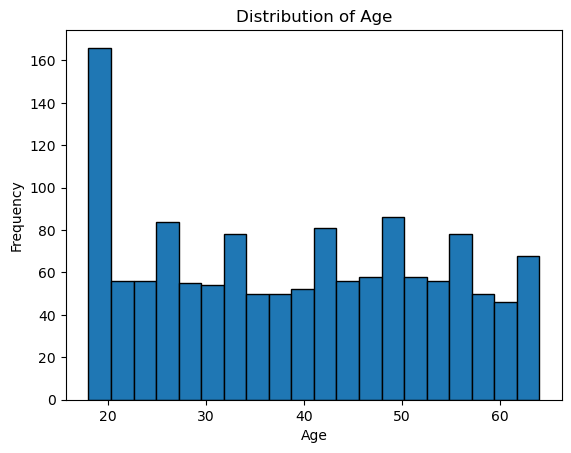

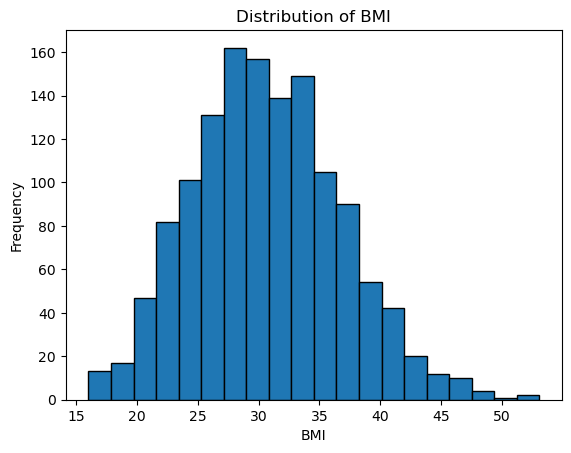

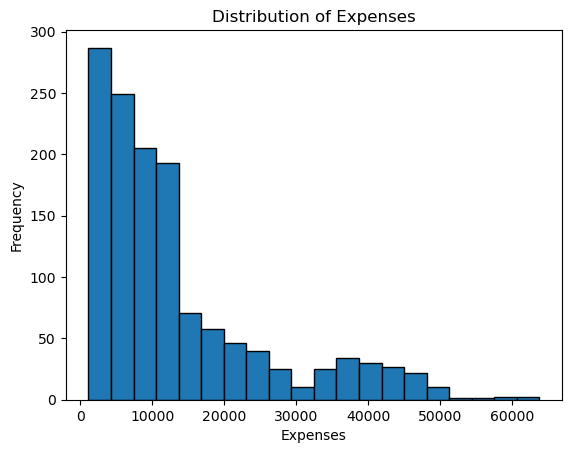

In [14]:
import matplotlib.pyplot as plt

# Plotting histogram for 'age'
plt.hist(df['age'], bins=20, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

# Plotting histogram for 'bmi'
plt.hist(df['bmi'], bins=20, edgecolor='black')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('Distribution of BMI')
plt.show()

# Plotting histogram for 'expenses'
plt.hist(df['expenses'], bins=20, edgecolor='black')
plt.xlabel('Expenses')
plt.ylabel('Frequency')
plt.title('Distribution of Expenses')
plt.show()


Let's plot some bar plots & visualize categorical variables, such as 'sex', 'smoker', and 'region', to understand their frequencies.

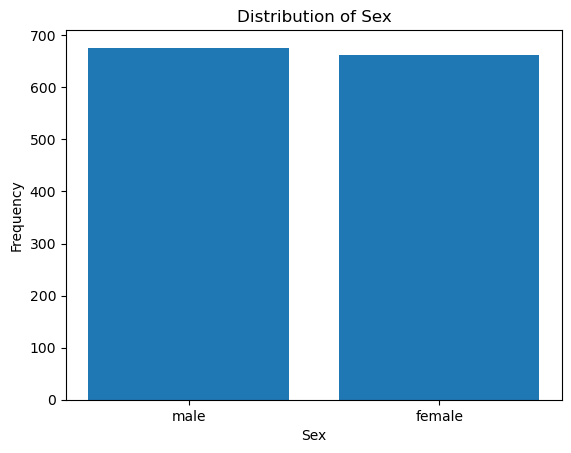

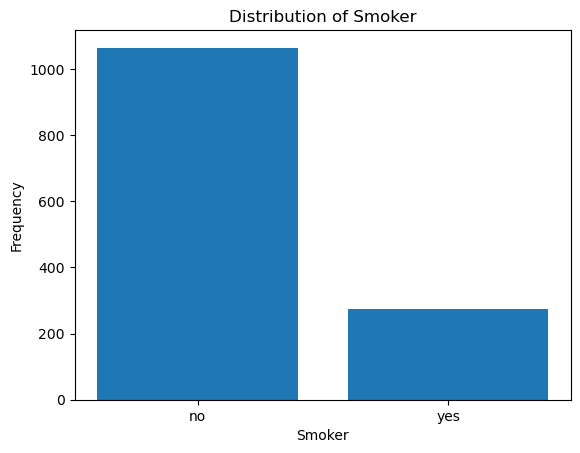

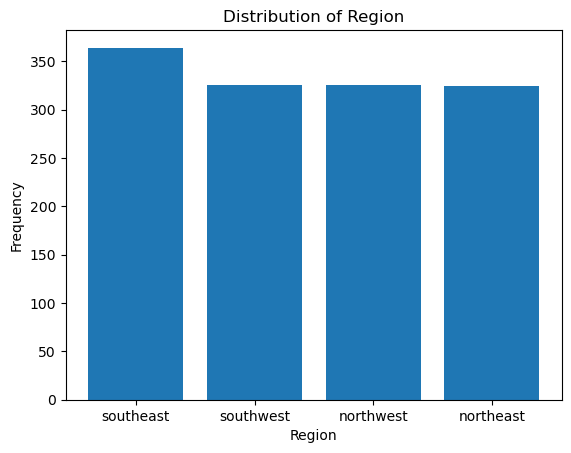

In [15]:
import matplotlib.pyplot as plt

# Plotting bar plot for 'sex'
sex_counts = df['sex'].value_counts()
plt.bar(sex_counts.index, sex_counts.values)
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.title('Distribution of Sex')
plt.show()

# Plotting bar plot for 'smoker'
smoker_counts = df['smoker'].value_counts()
plt.bar(smoker_counts.index, smoker_counts.values)
plt.xlabel('Smoker')
plt.ylabel('Frequency')
plt.title('Distribution of Smoker')
plt.show()

# Plotting bar plot for 'region'
region_counts = df['region'].value_counts()
plt.bar(region_counts.index, region_counts.values)
plt.xlabel('Region')
plt.ylabel('Frequency')
plt.title('Distribution of Region')
plt.show()


Let's plot some scatter plots and explore the relationship between numerical variables, such as 'age' vs. 'expenses', 'bmi' vs. 'expenses' and 'children' vs. 'expenses'.

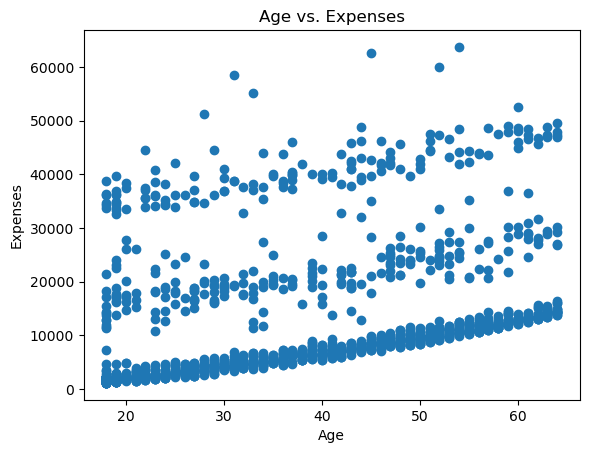

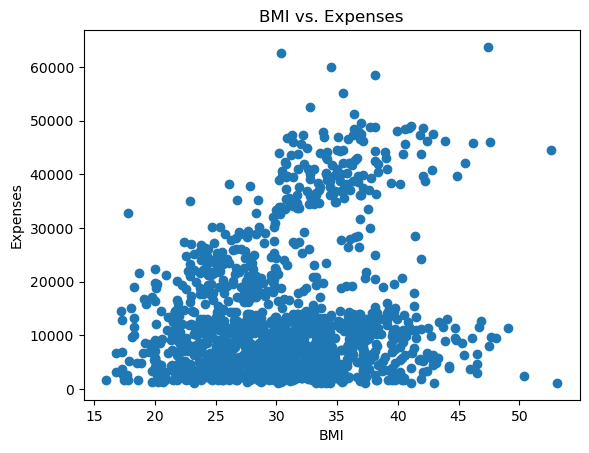

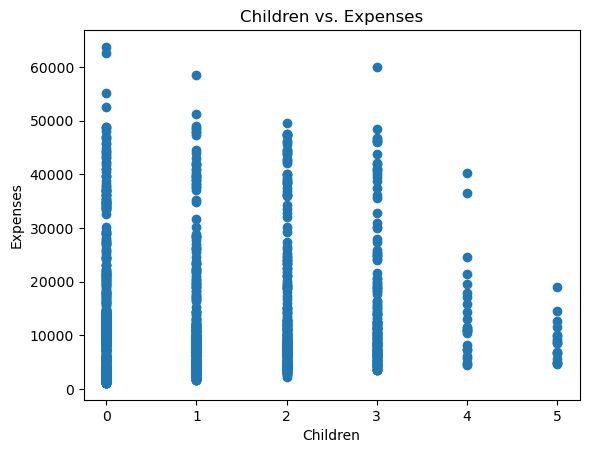

In [16]:
import matplotlib.pyplot as plt

# Scatter plot for 'age' vs. 'expenses'
plt.scatter(df['age'], df['expenses'])
plt.xlabel('Age')
plt.ylabel('Expenses')
plt.title('Age vs. Expenses')
plt.show()

# Scatter plot for 'bmi' vs. 'expenses'
plt.scatter(df['bmi'], df['expenses'])
plt.xlabel('BMI')
plt.ylabel('Expenses')
plt.title('BMI vs. Expenses')
plt.show()

# Scatter plot for 'children' vs. 'expenses'
plt.scatter(df['children'], df['expenses'])
plt.xlabel('Children')
plt.ylabel('Expenses')
plt.title('Children vs. Expenses')
plt.show()



Correlation Analysis:

We will now  Calculate the correlation coefficients between numerical variables to understand their linear relationships using corr() method in pandas. Additionally, we will create a correlation matrix heatmap using libraries  seaborn for a more visual representation of correlations.

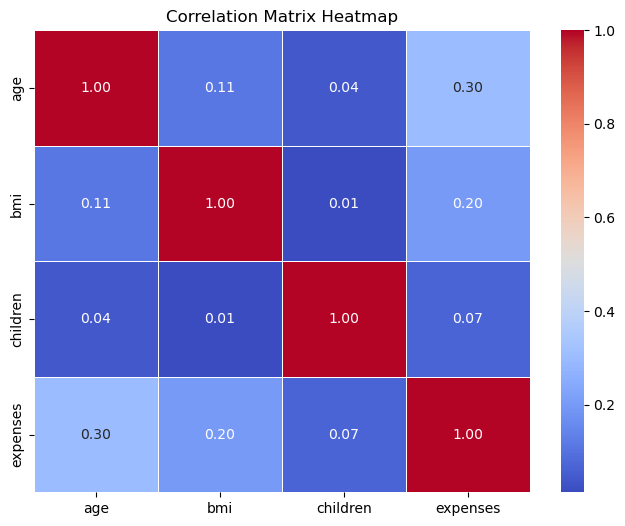

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
corr_matrix = df[['age', 'bmi', 'children', 'expenses']].corr()

# Create correlation matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


In [18]:
import pandas as pd

# Select the numerical columns of interest
numerical_columns = ['age', 'bmi', 'children', 'expenses']
numerical_data = df[numerical_columns]

# Calculate the correlation matrix
correlation_matrix = numerical_data.corr()

# Print the correlation matrix
print(correlation_matrix)


               age       bmi  children  expenses
age       1.000000  0.109341  0.042469  0.299008
bmi       0.109341  1.000000  0.012645  0.198576
children  0.042469  0.012645  1.000000  0.067998
expenses  0.299008  0.198576  0.067998  1.000000


The above correlation matrix shows the correlation coefficients between the numerical variables 'age', 'bmi', 'children', and 'expenses'. Here's the interpretation of the correlation values:

The correlation coefficient between 'age' and 'expenses' is approximately 0.299. This indicates a positive correlation, suggesting that there is a weak to moderate linear relationship between age and insurance expenses.

The correlation coefficient between 'bmi' and 'expenses' is approximately 0.199. This also indicates a positive correlation, suggesting a weak linear relationship between BMI and insurance expenses.

The correlation coefficient between 'children' and 'expenses' is approximately 0.068. This indicates a weak positive correlation, suggesting a minimal linear relationship between the number of children and insurance expenses.

The correlation coefficient between 'age' and 'bmi' is approximately 0.109. This suggests a weak positive correlation, indicating a small linear relationship between age and BMI.



# Data Preparation :

# Datatype Handling :

As checked above the datatypes of the features sex,smoker and region is object. We need to convert it into numerical datatype so that the ML model to be built understand it more accurately.

In [19]:
df['sex'].head()

0    female
1      male
2      male
3      male
4      male
Name: sex, dtype: object

In [20]:
df['sex'].nunique()

2

In [21]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

We will apply label encoding on the feature sex to convert it into numerical datatype.

In [22]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding on the 'sex' column
df['sex_encoded'] = label_encoder.fit_transform(df['sex'])




In [23]:
# Display the updated DataFrame
df.head()


,age,sex,bmi,children,smoker,region,expenses,sex_encoded
0,19,female,27.9,0,yes,southwest,16884.92,0
1,18,male,33.8,1,no,southeast,1725.55,1
2,28,male,33.0,3,no,southeast,4449.46,1
3,33,male,22.7,0,no,northwest,21984.47,1
4,32,male,28.9,0,no,northwest,3866.86,1


Let's drop sex column in object datatype, rename newly added sex_encoded to sex and replace its position to number 2 in the data.

In [24]:
# Rename 'sex_encoded' column back to 'sex'
df.rename(columns={'sex_encoded': 'Sex'}, inplace=True)


In [25]:
#Drop the original 'sex' column
df.drop('sex', axis=1, inplace=True)

In [26]:
# Change the position of the 'sex' column to column number 2
columns = df.columns.tolist()
columns.insert(1, columns.pop(columns.index('Sex')))
df = df[columns]

In [27]:
df.head()

,age,Sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,yes,southwest,16884.92
1,18,1,33.8,1,no,southeast,1725.55
2,28,1,33.0,3,no,southeast,4449.46
3,33,1,22.7,0,no,northwest,21984.47
4,32,1,28.9,0,no,northwest,3866.86


In [28]:
df['smoker'].head()

0    yes
1     no
2     no
3     no
4     no
Name: smoker, dtype: object

In [29]:
df['smoker'].nunique()

2

In [30]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [31]:
df.head()

,age,Sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,yes,southwest,16884.92
1,18,1,33.8,1,no,southeast,1725.55
2,28,1,33.0,3,no,southeast,4449.46
3,33,1,22.7,0,no,northwest,21984.47
4,32,1,28.9,0,no,northwest,3866.86


In [32]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding on the 'smoker' column
df['smoker_encoded'] = label_encoder.fit_transform(df['smoker'])

# Display the updated DataFrame
print(df.head())


   age  Sex   bmi  children smoker     region  expenses  smoker_encoded
0   19    0  27.9         0    yes  southwest  16884.92               1
1   18    1  33.8         1     no  southeast   1725.55               0
2   28    1  33.0         3     no  southeast   4449.46               0
3   33    1  22.7         0     no  northwest  21984.47               0
4   32    1  28.9         0     no  northwest   3866.86               0


C:\Users\scs\AppData\Local\Temp\ipykernel_10212\2145724440.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['smoker_encoded'] = label_encoder.fit_transform(df['smoker'])


In [33]:
df.head()

,age,Sex,bmi,children,smoker,region,expenses,smoker_encoded
0,19,0,27.9,0,yes,southwest,16884.92,1
1,18,1,33.8,1,no,southeast,1725.55,0
2,28,1,33.0,3,no,southeast,4449.46,0
3,33,1,22.7,0,no,northwest,21984.47,0
4,32,1,28.9,0,no,northwest,3866.86,0


Let's drop smoker column in object datatype, rename newly added sex_encoded to sex and replace its position to number 5 in the data.

In [34]:
# Drop the 'smoker' column
df = df.drop('smoker', axis=1)

In [35]:
# Rename 'sex_encoded' column to 'sex'
df = df.rename(columns={'smoker_encoded': 'Smoker'})

In [36]:
df.head()

,age,Sex,bmi,children,region,expenses,Smoker
0,19,0,27.9,0,southwest,16884.92,1
1,18,1,33.8,1,southeast,1725.55,0
2,28,1,33.0,3,southeast,4449.46,0
3,33,1,22.7,0,northwest,21984.47,0
4,32,1,28.9,0,northwest,3866.86,0


In [37]:
# Get the column you want to move
column_to_move = df['Smoker']

# Drop the column from its current position
df = df.drop('Smoker', axis=1)

# Insert the column at the desired position
df.insert(4, 'Smoker', column_to_move)



In [38]:
df.head()

,age,Sex,bmi,children,Smoker,region,expenses
0,19,0,27.9,0,1,southwest,16884.92
1,18,1,33.8,1,0,southeast,1725.55
2,28,1,33.0,3,0,southeast,4449.46
3,33,1,22.7,0,0,northwest,21984.47
4,32,1,28.9,0,0,northwest,3866.86


In [39]:
df['region'].head()

0    southwest
1    southeast
2    southeast
3    northwest
4    northwest
Name: region, dtype: object

In [40]:
df['region'].nunique()

4

In [41]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [42]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding on the 'region' column
df['region_encoded'] = label_encoder.fit_transform(df['region'])



In [43]:
df.head()

,age,Sex,bmi,children,Smoker,region,expenses,region_encoded
0,19,0,27.9,0,1,southwest,16884.92,3
1,18,1,33.8,1,0,southeast,1725.55,2
2,28,1,33.0,3,0,southeast,4449.46,2
3,33,1,22.7,0,0,northwest,21984.47,1
4,32,1,28.9,0,0,northwest,3866.86,1


Let's drop sregion column in object datatype, rename newly added region_encoded to Region and replace its position to number 6 in the data.

In [44]:
# Drop the 'smoker' column
df = df.drop('region', axis=1)

In [45]:
# Rename 'region_encoded' column to 'Region'
df = df.rename(columns={'region_encoded': 'Region'})

In [46]:
df.head()

,age,Sex,bmi,children,Smoker,expenses,Region
0,19,0,27.9,0,1,16884.92,3
1,18,1,33.8,1,0,1725.55,2
2,28,1,33.0,3,0,4449.46,2
3,33,1,22.7,0,0,21984.47,1
4,32,1,28.9,0,0,3866.86,1


In [47]:
# Get the column you want to move
column_to_move = df['Region']

# Drop the column from its current position
df = df.drop('Region', axis=1)

# Insert the column at the desired position
df.insert(5, 'Region', column_to_move)


In [48]:
df.head()

,age,Sex,bmi,children,Smoker,Region,expenses
0,19,0,27.9,0,1,3,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,1,21984.47
4,32,1,28.9,0,0,1,3866.86


In [49]:
df.dtypes

age           int64
Sex           int32
bmi         float64
children      int64
Smoker        int32
Region        int32
expenses    float64
dtype: object

In [50]:
df.isnull().sum()

age         0
Sex         0
bmi         0
children    0
Smoker      0
Region      0
expenses    0
dtype: int64

# Outliers Handling :

# Ouliers Identification :

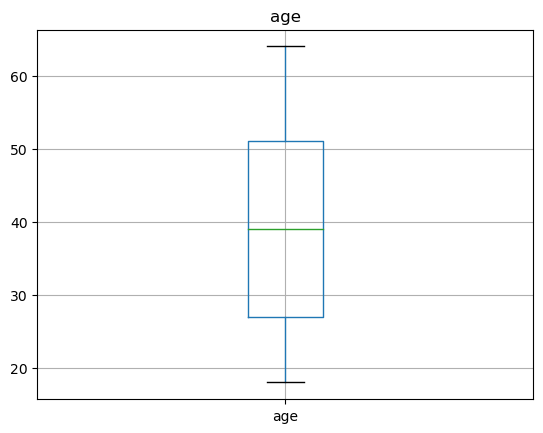

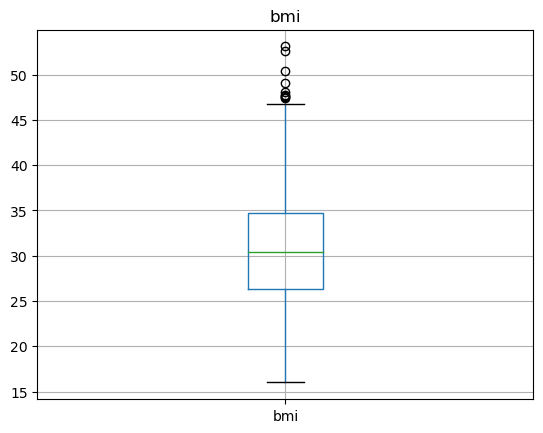

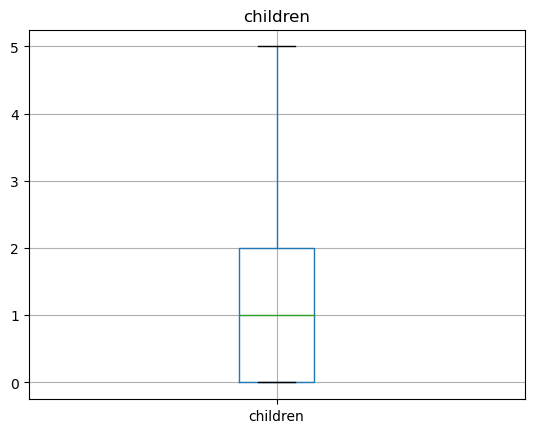

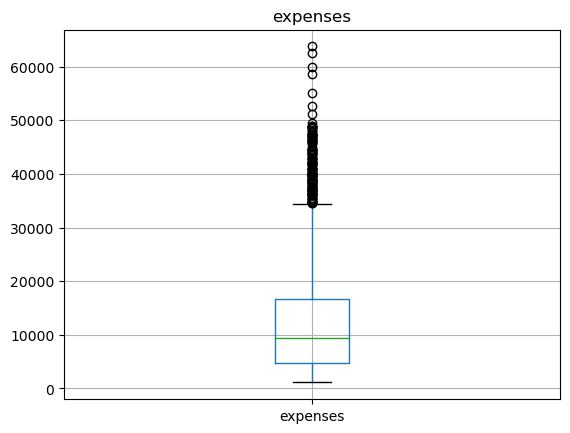

In [51]:
import matplotlib.pyplot as plt

# Select the numerical columns
numerical_columns = ['age', 'bmi', 'children', 'expenses']

# Create box plots for each numerical column
for column in numerical_columns:
    plt.figure()
    df.boxplot(column=column)
    plt.title(column)
    plt.show()


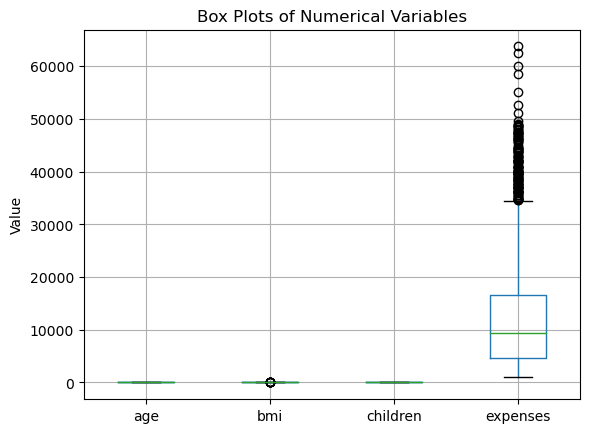

In [52]:
import matplotlib.pyplot as plt

# Select the numerical columns
numerical_columns = ['age', 'bmi', 'children', 'expenses']

# Create a box plot for all numerical columns
plt.figure()
df[numerical_columns].boxplot()
plt.title('Box Plots of Numerical Variables')
plt.ylabel('Value')
plt.show()


From the box plots plotted we can see the ouliers in the bmi and expenses featues only.

In [53]:
# Select the numerical columns
numerical_columns = ['age', 'bmi', 'children', 'expenses']

# Calculate the IQR for each column
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Define the threshold
threshold = 1.5

# Identify outliers
outliers = ((df[numerical_columns] < (Q1 - threshold * IQR)) | (df[numerical_columns] > (Q3 + threshold * IQR))).any(axis=1)

# Display the rows with outliers
rows_with_outliers = df[outliers]



In [54]:
rows_with_outliers

,age,Sex,bmi,children,Smoker,Region,expenses
14,27,1,42.1,0,1,2,39611.76
19,30,1,35.3,0,1,3,36837.47
23,34,0,31.9,1,1,0,37701.88
29,31,1,36.3,2,1,3,38711.00
30,22,1,35.6,0,1,3,35585.58
...,...,...,...,...,...,...,...
1301,62,1,30.9,3,1,1,46718.16
1303,43,1,27.8,0,1,3,37829.72
1313,19,0,34.7,2,1,3,36397.58
1317,18,1,53.1,0,0,2,1163.46


# 

In [55]:
df[df['bmi']>46.5].shape

(11, 7)

In [56]:
df[df['expenses']>35000]

,age,Sex,bmi,children,Smoker,Region,expenses
14,27,1,42.1,0,1,2,39611.76
19,30,1,35.3,0,1,3,36837.47
23,34,0,31.9,1,1,0,37701.88
29,31,1,36.3,2,1,3,38711.00
30,22,1,35.6,0,1,3,35585.58
...,...,...,...,...,...,...,...
1300,45,1,30.4,0,1,2,62592.87
1301,62,1,30.9,3,1,1,46718.16
1303,43,1,27.8,0,1,3,37829.72
1313,19,0,34.7,2,1,3,36397.58


In [57]:
# Lets not remove any outlier and move further.

In [58]:
df.shape

(1338, 7)

# Feature Selection :

In [59]:
from sklearn.feature_selection import SelectKBest, f_regression

# Split the DataFrame into feature matrix (X) and target variable (y)
X = df.drop('expenses', axis=1)  # Feature matrix
y = df['expenses']  # Target variable

# Apply SelectKBest to select the top K features
selector = SelectKBest(score_func=f_regression, k=3)
X_selected = selector.fit_transform(X, y)

# Get the column names of the selected features
selected_feature_names = X.columns[selector.get_support()].tolist()

# Print the selected features
print("Selected Features:", selected_feature_names)


Selected Features: ['age', 'bmi', 'Smoker']


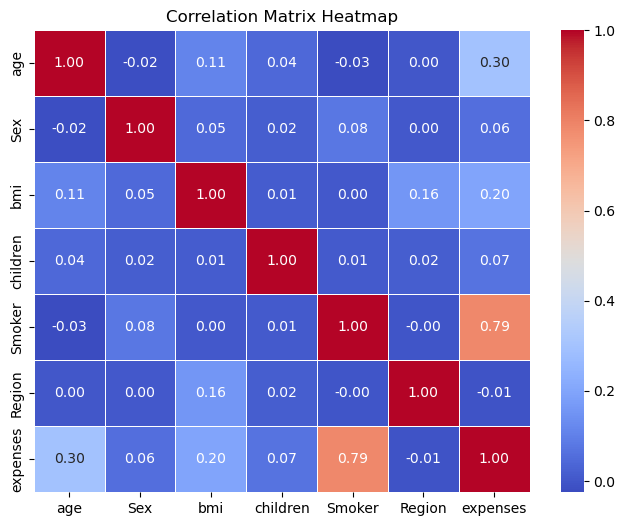

In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
corr_matrix = df[['age','Sex', 'bmi', 'children','Smoker','Region', 'expenses']].corr()

# Create correlation matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [61]:
import pandas as pd

# Select the numerical columns of interest
numerical_columns = ['age','Sex', 'bmi', 'children','Smoker','Region','expenses']
numerical_data = df[numerical_columns]

# Calculate the correlation matrix
correlation_matrix = numerical_data.corr()

# Print the correlation matrix
print(correlation_matrix)

               age       Sex       bmi  children    Smoker    Region  expenses
age       1.000000 -0.020856  0.109341  0.042469 -0.025019  0.002127  0.299008
Sex      -0.020856  1.000000  0.046380  0.017163  0.076185  0.004588  0.057292
bmi       0.109341  0.046380  1.000000  0.012645  0.003968  0.157439  0.198576
children  0.042469  0.017163  0.012645  1.000000  0.007673  0.016569  0.067998
Smoker   -0.025019  0.076185  0.003968  0.007673  1.000000 -0.002181  0.787251
Region    0.002127  0.004588  0.157439  0.016569 -0.002181  1.000000 -0.006208
expenses  0.299008  0.057292  0.198576  0.067998  0.787251 -0.006208  1.000000


The above correlation matrix shows the correlation coefficients between the independent variable and the dependent(target variable) in the DataFrame. Here are some observations based on the correlation values:

- Age and expenses have a positive correlation of approximately 0.299. This suggests that as age increases, insurance expenses tend to increase as well.

- There is a weak positive correlation between sex and expenses, with a correlation coefficient of approximately 0.057. However, it's important to note that this correlation is very small.

- BMI and expenses have a positive correlation of around 0.199. This indicates that higher BMI values are associated with higher insurance expenses.

- There is a weak positive correlation between the number of children and expenses, with a correlation coefficient of approximately 0.068. This suggests that having more children may be slightly associated with higher insurance expenses.

- Smoker and expenses show a strong positive correlation of about 0.787. This indicates that smoking status has a significant impact on insurance expenses, with smokers generally having higher expenses compared to non-smokers.

- Region and expenses have a weak negative correlation, with a coefficient of approximately -0.006. This suggests a very slight negative association between region and insurance expenses, but it is not significant.

In [62]:
df.head()

,age,Sex,bmi,children,Smoker,Region,expenses
0,19,0,27.9,0,1,3,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,1,21984.47
4,32,1,28.9,0,0,1,3866.86


- From the feature selection and from correlation matrix as well the most relevant features for insurance premium predictuons are Selected Features: ['age', 'bmi', 'Smoker']. The other feature appears too be less important than these. So let's drop the rest of the features from the dataframe.

In [63]:
df= df.drop(['Sex', 'children', 'Region'], axis=1)


In [64]:
df.head()

,age,bmi,Smoker,expenses
0,19,27.9,1,16884.92
1,18,33.8,0,1725.55
2,28,33.0,0,4449.46
3,33,22.7,0,21984.47
4,32,28.9,0,3866.86


# Modelling :

We will build a Machine Learning Model using linear regression alorithm.

# 1]Multiple Linear Regression Algorithm :

In [65]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Split the DataFrame into feature matrix (X) and target variable (y)
X = df[['age', 'bmi', 'Smoker']]  # Selected features
y = df['expenses']  # Target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of the LinearRegression model
lr = LinearRegression()

# Fit the model to the training data
lr.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = lr.predict(X_test)


In [66]:
lr = LinearRegression()

In [67]:
lr.fit(X,y)

LinearRegression()

# Model Evaluation :

Let's analyze the performance of the linear regression model. 

In [68]:
lr.predict([[19,27.9,1]])

array([26077.77541254])

In [69]:
lr.predict([[61,29.1,1]])

array([37365.38792301])

In [70]:
lr.score(X,y)

0.7474906878170721

# R-squared score of 0.7474906878170721 suggests that your linear regression model explains about 74.75% of the variance in the target variable using the given features.

In [71]:
# Calculate the accuracy on the training data
train_accuracy = lr.score(X_train, y_train)

# Calculate the accuracy on the testing data
test_accuracy = lr.score(X_test, y_test)

# Print the accuracy scores
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)


Training Accuracy: 0.7392047005615872
Testing Accuracy: 0.7780612629418429


- The training accuracy of 0.7392 suggests that linear regression model explains approximately 73.92% of the variance in the target variable based on the training data.

- The testing accuracy of 0.7781 indicates that model also performs well on unseen data, explaining around 77.81% of the variance in the target variable based on the testing data.

- These accuracy scores suggest that linear regression model has a decent fit to the data and is able to generalize well to unseen data.

In [72]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)

# Calculate RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Calculate R2 score
r2 = r2_score(y_test, y_pred)

# Print the metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)


Mean Absolute Error (MAE): 4261.061610818272
Mean Squared Error (MSE): 34515867.9306065
Root Mean Squared Error (RMSE): 5875.020674908855
R-squared (R2) Score: 0.7776737555148191


Based on the above values, the metrics for your regression model are as follows:

- Mean Absolute Error (MAE): 4261.061610818272
- Mean Squared Error (MSE): 34515867.9306065
- Root Mean Squared Error (RMSE): 5875.020674908855
- R-squared (R2) Score: 0.7776737555148191

The MAE represents an average absolute difference of approximately 4261.06 between the predicted and actual values.

The MSE indicates an average squared difference of around 34515867.93. The RMSE is the square root of MSE, which is approximately 5875.02, and it provides a more interpretable scale.

The R-squared (R2) score of 0.7776 indicates that the regression model explains around 77.77% of the variance in the target variable.

Lower values of MAE, MSE, and RMSE indicate better model performance, while a higher R2 score suggests a better fit of the model to the data.

# Visualisaing the model Evaluation:

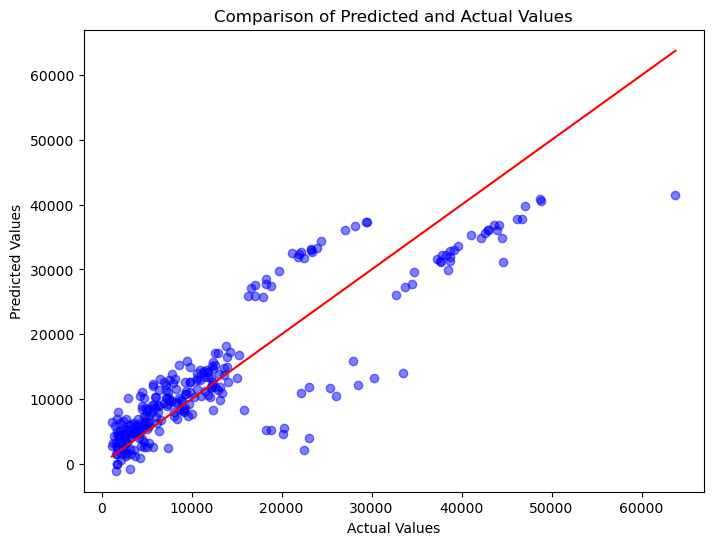

In [73]:
import matplotlib.pyplot as plt

# Plotting the predicted and actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)  # Scatter plot
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')  # Line plot
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Comparison of Predicted and Actual Values')
plt.show()


# Visualising the Train Set Results :

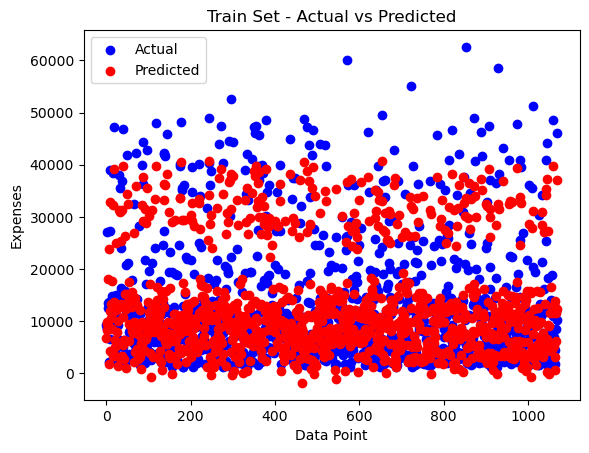

In [74]:
import matplotlib.pyplot as plt

# Predict the target variable for the train set and test set
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# Plotting the predicted values and actual values for the train set
plt.scatter(range(len(y_train)), y_train, color='blue', label='Actual')
plt.scatter(range(len(y_train)), y_train_pred, color='red', label='Predicted')
plt.title('Train Set - Actual vs Predicted')
plt.xlabel('Data Point')
plt.ylabel('Expenses')
plt.legend()
plt.show()



# Visualising the Test Set Results :

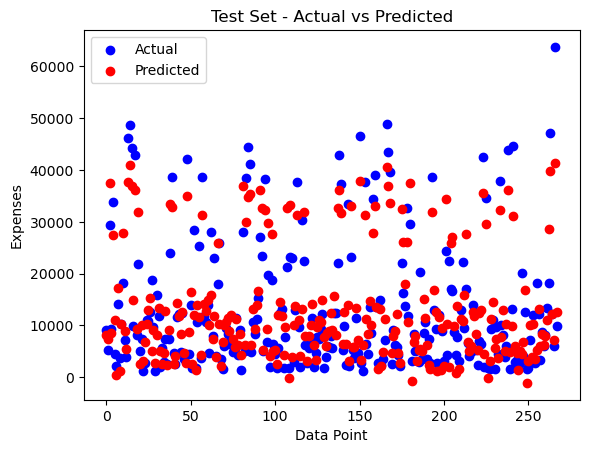

In [75]:
# Plotting the predicted values and actual values for the test set
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(range(len(y_test)), y_test_pred, color='red', label='Predicted')
plt.title('Test Set - Actual vs Predicted')
plt.xlabel('Data Point')
plt.ylabel('Expenses')
plt.legend()
plt.show()


# Insurance Premium Prediction for myself :

In [82]:
lr.predict([[23,29.4,0]])

array([3777.3382388])